In [1]:
import pandas as pd

In [2]:
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")

In [3]:
# Add country name as a column
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sierra['country'] = 'Sierra Leone'

In [4]:
# Combine all into one DataFrame
df_all = pd.concat([benin, togo, sierra], ignore_index=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
metrics = ['GHI', 'DNI', 'DHI']

C:\Users\Home\AppData\Local\Temp\ipykernel_12760\3319588835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='country', y=metric, palette='Set2')


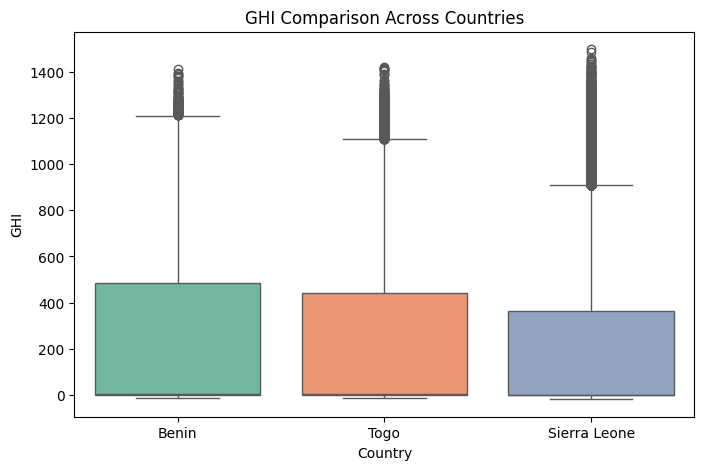

C:\Users\Home\AppData\Local\Temp\ipykernel_12760\3319588835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='country', y=metric, palette='Set2')


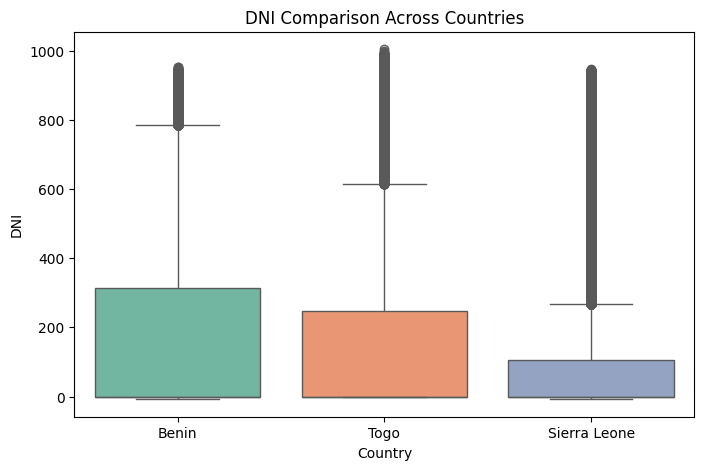

C:\Users\Home\AppData\Local\Temp\ipykernel_12760\3319588835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='country', y=metric, palette='Set2')


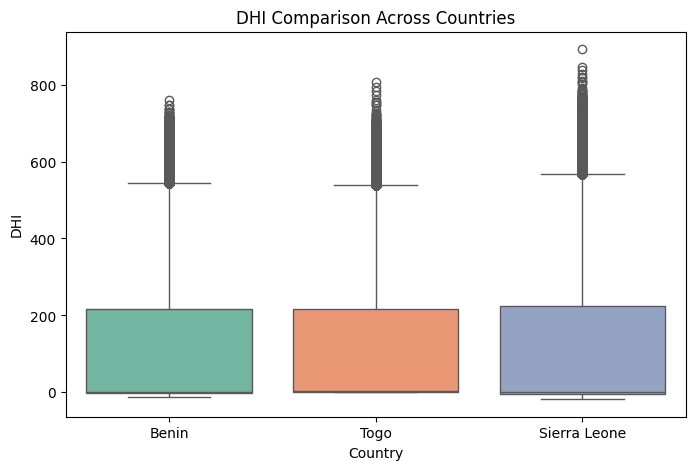

In [7]:
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='country', y=metric, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.show()

In [8]:
summary = df_all.groupby("country")[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [9]:
from scipy.stats import f_oneway, kruskal

# Get GHI values per country
ghi_benin = benin['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()
ghi_sierra = sierra['GHI'].dropna()

# One-way ANOVA
f_stat, p_val_anova = f_oneway(ghi_benin, ghi_togo, ghi_sierra)

# Kruskal–Wallis (non-parametric)
h_stat, p_val_kruskal = kruskal(ghi_benin, ghi_togo, ghi_sierra)

print("ANOVA p-value:", round(p_val_anova, 4))
print("Kruskal–Wallis p-value:", round(p_val_kruskal, 4))

ANOVA p-value: 0.0
Kruskal–Wallis p-value: 0.0


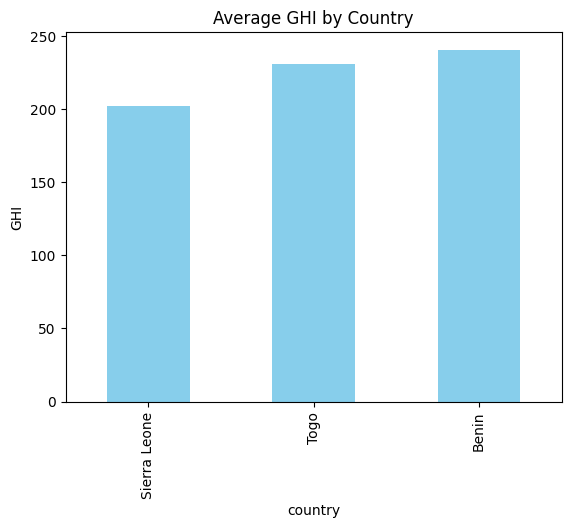

In [10]:
df_all.groupby("country")["GHI"].mean().sort_values().plot(
    kind='bar', color='skyblue', title="Average GHI by Country", ylabel="GHI"
)
plt.show()

In [11]:
# Calculate solar score: mean of GHI, DNI, DHI
solar_score = df_all.groupby('country')[['GHI', 'DNI', 'DHI']].mean().sum(axis=1).sort_values(ascending=False)

# Display as a DataFrame
solar_score_df = solar_score.reset_index()
solar_score_df.columns = ['Country', 'Solar Score']
solar_score_df

,Country,Solar Score
0,Benin,523.105929
1,Togo,498.257861
2,Sierra Leone,432.054423


C:\Users\Home\AppData\Local\Temp\ipykernel_12760\75680459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=solar_score_df, x='Solar Score', y='Country', palette='YlOrRd')


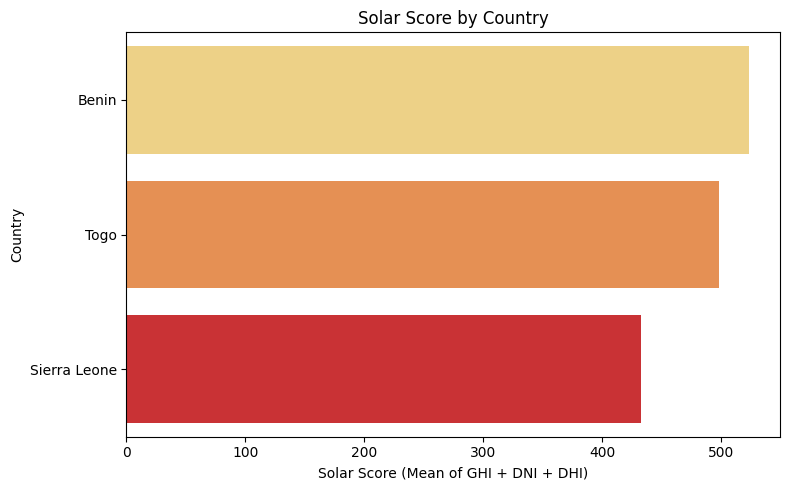

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=solar_score_df, x='Solar Score', y='Country', palette='YlOrRd')
plt.title('Solar Score by Country')
plt.xlabel('Solar Score (Mean of GHI + DNI + DHI)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()